In [1]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from preprocessing import stretch_interpolate
plt.rcParams["figure.figsize"] = (15, 10)

In [2]:
data_path = "./data/concatenated"
X, y = np.load(f"{data_path}/X.npy", allow_pickle=True), np.load(f"{data_path}//y.npy")

In [3]:
i = 50590
X_selected = stretch_interpolate(X[i].ravel(), target_length=30).reshape(1, -1)

In [4]:
def kernel(array):
    array = np.array(array)
    array = (array - np.mean(array)) / np.std(array)
    return lambda shape, dtype: tf.convert_to_tensor(array.reshape(shape), dtype=dtype)

# Kernel 1 - derivative kernel

In [5]:
input_layer = keras.layers.Input((None, 1))

output_layer = keras.layers.Conv1D(filters=1, 
                                   kernel_size=5, 
                                   padding="valid", 
                                   use_bias=False, 
                                   kernel_initializer=kernel([-2, -1, 0, 1, 2]))(input_layer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer) 

In [6]:
output = model.predict(X_selected)

1/1 [==============================] - 0s 206ms/step


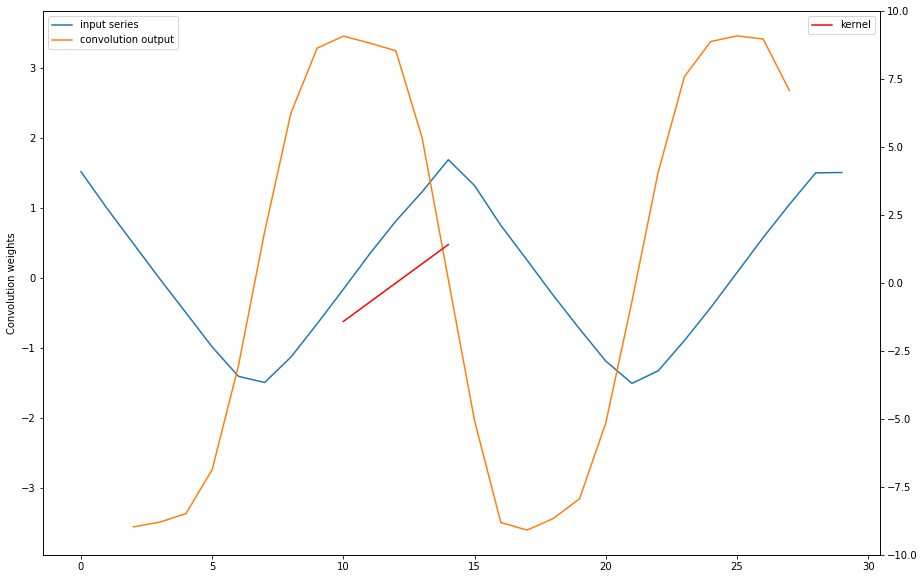

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylim(-10, 10)
ax1.set_ylabel("Series values")
ax1.set_ylabel("Convolution weights")

ax1.plot(X_selected.ravel())
ax1.plot(np.arange(len(output.ravel())) + 2, output.ravel())
ax2.plot(np.arange(5) + 10, model.weights[0].numpy().ravel(), c='r')

ax1.legend(["input series", "convolution output"], loc='upper left')
ax2.legend(["kernel"], loc='upper right')

# Kernel 2 - slope kernel

In [9]:
input_layer = keras.layers.Input((None, 1))

output_layer = keras.layers.Conv1D(filters=1, 
                                   kernel_size=5, 
                                   padding="valid", 
                                   use_bias=False, 
                                   kernel_initializer=kernel([-1, 0, 1, 0, -1]))(input_layer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer) 

In [10]:
output = model.predict(X_selected)

1/1 [==============================] - 0s 123ms/step


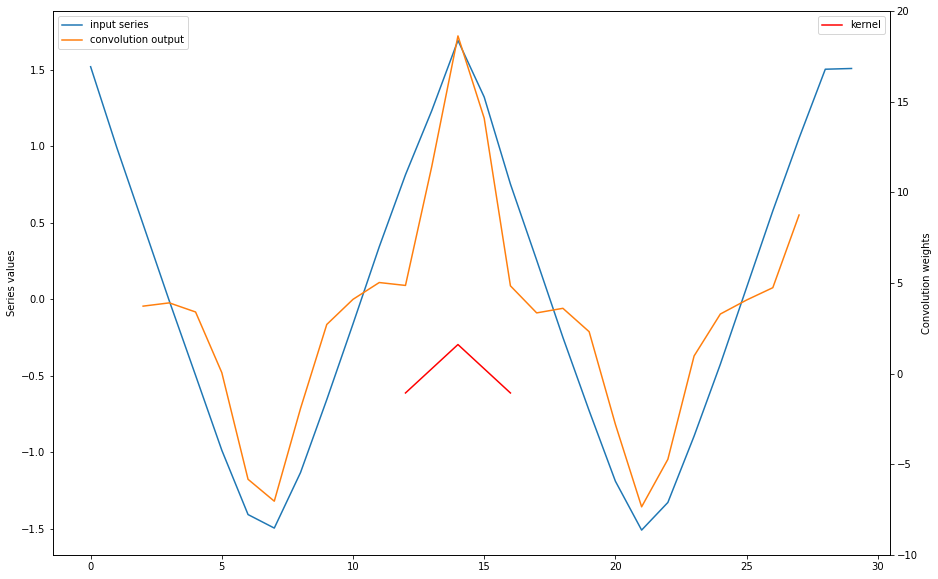

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylim(-10, 20)
ax1.set_ylabel("Series values")
ax2.set_ylabel("Convolution weights")

ax1.plot(X_selected.ravel())
ax1.plot(np.arange(len(output.ravel())) + 2, output.ravel())
ax2.plot(np.arange(5) + 12, model.weights[0].numpy().ravel(), c='r')

ax1.legend(["input series", "convolution output"], loc='upper left')
ax2.legend(["kernel"], loc='upper right')